## Function Library

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
from numpy import log, abs, exp, conj,pi,angle,sqrt
def dist2o(t):
    # distant measure from (0,t) to (0,0)
    dist = log((1+abs(t))/(1-abs(t))) # 2 * np.arctanh(abs(t))
    return dist

def invdist(d):
    # transform the distance `d` to euclidean parameter `t`
    t = (exp(d) - 1) / (exp(d) + 1)
    return t

def dist(z1, z2):
    # distance between `z1` and `z2` 
    t = abs(z2 - z1) / abs(1 - z2*conj(z1))
    return dist2o(t)

def arc(z1, z2, interp_n=100):
    # distance between `z1` and `z2` 
    Z = (z2 - z1) / (1 - z2*conj(z1))
    theta = angle(Z)
    t = abs(Z) 
    t_arr = np.linspace(0,t,interp_n)
    return proj(z1, theta, t_arr)

def vel_ang(z1, z2):
    # theta angle for the initial velocity from z1 to z2 through a geodesic
    Z = (z2 - z1) / (1 - z2*conj(z1))
    theta = angle(Z)
    return theta

def proj(z0, theta, t):
    z2 = (z0 + exp(1j*theta) * t) / (1 + conj(z0) * exp(1j*theta) * t)
    return z2

def proj_d(z0, theta, d):
    t = invdist(d)
    z2 = proj(z0, theta, t)
    return z2

def U(frac):
    return exp(frac*pi*1j)
#def curv()
def fit_mobius(z0,th0,w0,th1):
    '''Fit mobius transform sending z0->w0, z1->w1'''
    a = z0
    theta = th0
    def mobius(z):
        t_arr = (z - z0) / (1 - conj(z0)*z) * exp(1j*th0)
        return proj(w0, th1, t_arr)
    return mobius
circ_th = np.linspace(0,2*np.pi,1000)
unit_circ = np.exp(1j*circ_th)

## Draw Octagon

(-1.0999948080833182,
 1.0999997527658723,
 -1.0999986402114572,
 1.0999986402114572)

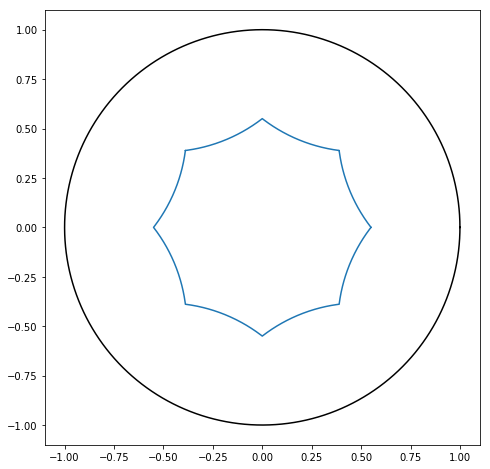

In [5]:
D = 0.55
plt.figure(figsize=[8,8])
plt.plot(unit_circ.real, unit_circ.imag,'k')
vtx = []
edges = []
for i in range(8):
    curv = arc(D*U((i)/4), D*U((i+1)/4), interp_n=100)
    vtx.append(D*U((i)/4))
    edges.append(curv)
    # plt.plot(curv.real,curv.imag)
edges = np.array(edges)
vtx = np.array(vtx)
polygon = edges.reshape(-1)
plt.plot(polygon.real,polygon.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')

In [7]:
th0 = vel_ang(vtx[0], vtx[1])
th1 = vel_ang(vtx[2], vtx[3])
mobius = fit_mobius(vtx[0],th0,vtx[2],th1)

In [8]:
mob_list = []
for i in range(8):
    th0 = vel_ang(vtx[0], vtx[1])
    th1 = vel_ang(vtx[i], vtx[(i+1)%8])
    mobius = fit_mobius(vtx[0],th0,vtx[i],th1)
    mob_list.append(mobius)

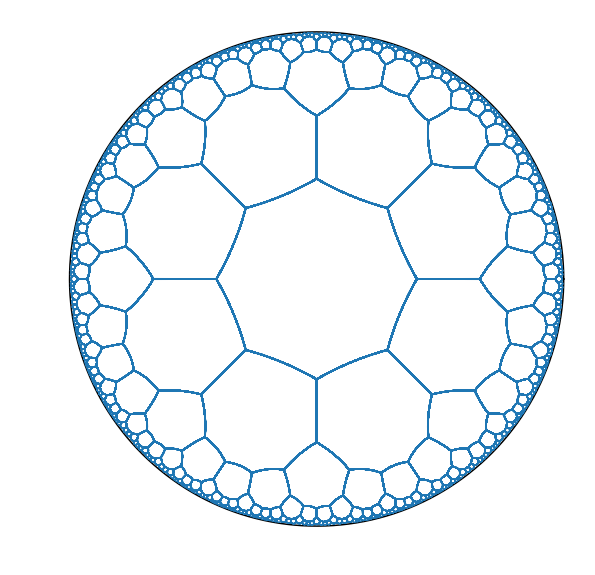

In [42]:
# Draw the initial octagon
D = 0.4057
vtx = []
edges = []
for i in range(8):
    curv = arc(D*U((i)/4), D*U((i+1)/4), interp_n=100)
    vtx.append(D*U((i)/4))
    edges.append(curv)
edges = np.array(edges)
vtx = np.array(vtx)
polygon = edges.reshape(-1)
# compute the list of mobius transform
mob_list = []
for i in range(8):
    th0 = vel_ang(vtx[0], vtx[1])
    th1 = vel_ang(vtx[i], vtx[(i+1)%8])
    mobius = fit_mobius(vtx[0],th0,vtx[i],th1)
    mob_list.append(mobius)
# Recursively act on the existing image patch 
plt.figure(figsize=[10,10])
plt.plot(unit_circ.real, unit_circ.imag,'k')
#plt.plot(polygon.real,polygon.imag)
poly_cur = polygon
polys = list(polygon)
for r in range(4):
    new_poly = []
    for i, mobius in enumerate(mob_list):
        poly_i = mobius(poly_cur) # apply the mobius transform to all your points! 
        new_poly += list(poly_i) + [np.nan]
    polys += new_poly
    poly_cur = np.array(new_poly)
plt.plot(poly_cur.real,poly_cur.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')
plt.axis('off')
plt.box(False)
plt.savefig("octa_tessal8-3.png")

In [46]:
del new_poly,poly_cur

## Any Equilateral Polygon

In [12]:
from scipy.optimize import minimize_scalar
minimize_scalar(Eq, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)

     fun: 1.0966227112321507
    nfev: 25
     nit: 20
 success: True
       x: 1.2084132696443708e-11

In [40]:
Eq = D_equation(8,6)
minimize_scalar(Eq, bracket=None, bounds=[0,1], args=(), method='Bounded', tol=None, options=None)

     fun: 8.513094849992674e-13
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.783590290682594

In [48]:
def D_equation(p=6,q=6):
    # p = 6;
    # q = 5
    # D = 0.55
    #     th1 = vel_ang(D*U((0)/p*2), D*U((1)/p*2))
    def equation(D):
        th1 = vel_ang(D*U((0)/p*2), D*U((1)/p*2))
        return ((pi - th1) - pi / q)**2
    return equation
def D_solver(p=6,q=6):
    result = minimize_scalar(D_equation(p,q), bounds=[0,1], method='Bounded', 
                             tol=None, options=None)
    print(result)
    if result.success and result.fun < 1E-10:
        return result.x

In [57]:
D_solver(p=7,q=6)

     fun: 8.513094849992674e-13
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.783590290682594


0.783590290682594

     fun: 2.3091466579047814e-15
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.6939800752854441


(-1.0999948080833182,
 1.0999997527658723,
 -1.0999986402114572,
 1.0999986402114572)

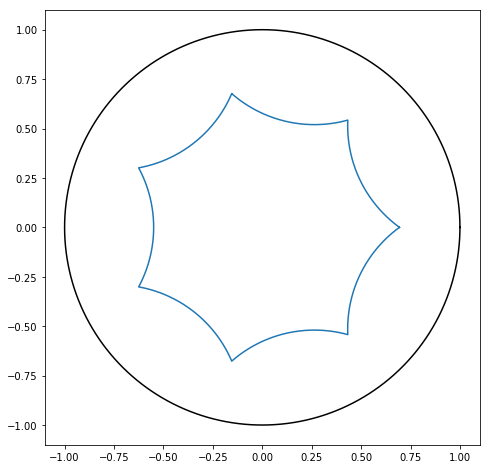

In [62]:
p = 7; q = 5
D = D_solver(p=p,q=q)
vtx = []
edges = []
for i in range(p):
    curv = arc(D*U((i)/p*2), D*U((i+1)/p*2), interp_n=100)
    vtx.append(D*U((i)/p*2))
    edges.append(curv)
    # plt.plot(curv.real,curv.imag)
edges = np.array(edges)
vtx = np.array(vtx)
polygon = edges.reshape(-1)

plt.figure(figsize=[8,8])
plt.plot(unit_circ.real, unit_circ.imag,'k')
plt.plot(polygon.real,polygon.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')

     fun: 2.548252264916422e-16
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.605000356556583


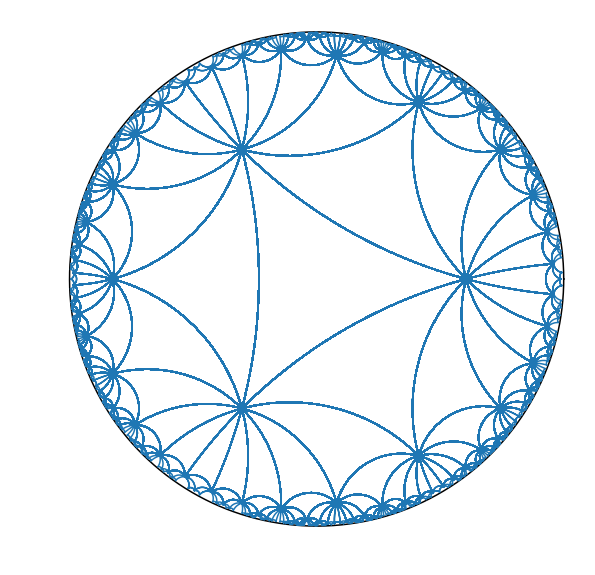

In [102]:
p = 3; q = 12
D = D_solver(p=p,q=q)
vtx = []
edges = []
for i in range(p):
    curv = arc(D*U((i)/p*2), D*U((i+1)/p*2), interp_n=50)
    vtx.append(D*U((i)/p*2))
    edges.append(curv)
    # plt.plot(curv.real,curv.imag)
edges = np.array(edges)
vtx = np.array(vtx)
polygon = edges.reshape(-1)

mob_list = []
for i in range(p):
    th0 = vel_ang(vtx[0], vtx[1])
    th1 = vel_ang(vtx[i], vtx[(i+1)%p])
    mobius = fit_mobius(vtx[0],th0,vtx[i],th1)
    mob_list.append(mobius)

# Recursively act on the existing image patch 
plt.figure(figsize=[10,10])
plt.plot(unit_circ.real, unit_circ.imag,'k')
poly_cur = polygon
polys = list(polygon) # all poly 
for r in range(8):
    new_poly = []
    for i, mobius in enumerate(mob_list):
        poly_i = mobius(poly_cur) # apply the mobius transform to all your points! 
        new_poly += list(poly_i) + [np.nan]
    polys += new_poly
    poly_cur = np.array(new_poly)
plt.plot(poly_cur.real,poly_cur.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')
plt.axis('off')
plt.box(False)
plt.savefig("tri_tessal%d-%d.png"%(p,q))

In [48]:
curv = proj(0.5, 1.1, np.arange(0,5,0.01))

(-1.0999948080833182,
 1.0999997527658723,
 -1.0999986402114572,
 1.0999986402114572)

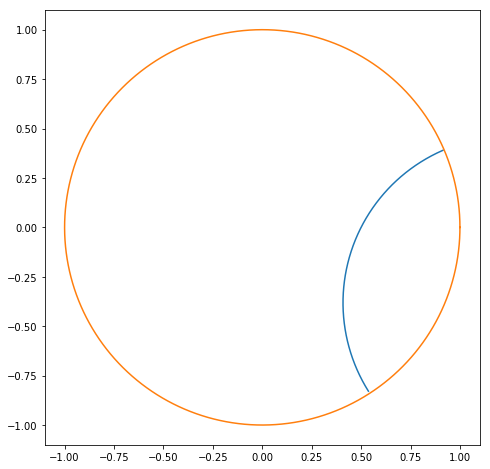

In [76]:
curv = proj_d(0.5, 1.1, np.arange(-5,5,0.01))
plt.figure(figsize=[8,8])
plt.plot(curv.real,curv.imag)
plt.plot(unit_circ.real, unit_circ.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')

(-1.0999948080833182,
 1.0999997527658723,
 -1.0999986402114572,
 1.0999986402114572)

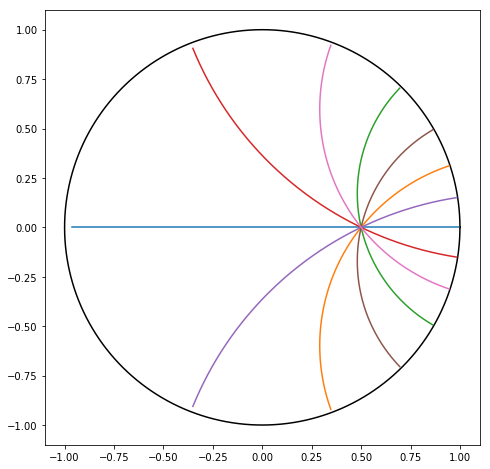

In [80]:
z0 = np.array([0.5])
plt.figure(figsize=[8,8])
plt.plot(unit_circ.real, unit_circ.imag, 'k')
for ang in np.linspace(0,2*pi,7,endpoint=False,):
    curv = proj_d(z0, ang, np.arange(-5,5,0.01))
    plt.plot(curv.real,curv.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')

In [81]:
curv[-1]

(0.9446019367186808-0.3112692837978982j)

In [ ]:
d = 0.5
z0 = np.array([d])

(-1.0999948080833182,
 1.0999997527658723,
 -1.0999986402114572,
 1.0999986402114572)

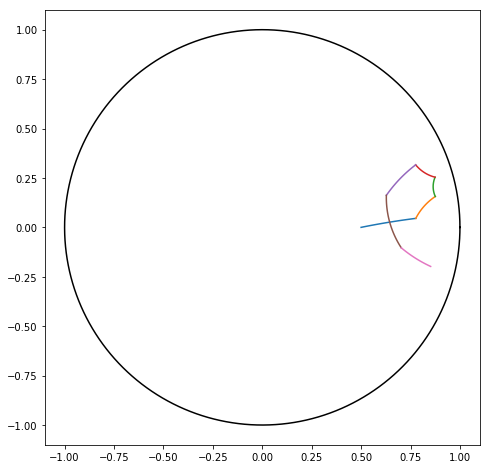

In [84]:
z0 = np.array([0.5])
plt.figure(figsize=[8,8])
plt.plot(unit_circ.real, unit_circ.imag, 'k')
csr = z0
for ang in np.linspace(0,2*pi,7,endpoint=False,):
    curv = proj_d(csr, 0.2+ang, np.arange(0,1,0.01))
    plt.plot(curv.real,curv.imag)
    csr = curv[-1]
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('image')

In [16]:
z1 = np.array([0.2+0.4j])
ang = 0.5

In [13]:
np.abs(np.array([1.0+5.0j]))**2

array([26.])

In [44]:
theta = 0.5
np.exp(1j*theta)

(0.8775825618903728+0.479425538604203j)

In [37]:
dist(0.99, -0.9j)

7.547387850150975